## CBC example

In [1]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Walney Extension

In [3]:
locations = load_repository()
L = locations.walneyext
capacity = 5

In [4]:
wfn = WindFarmNetwork(L=L, cables=capacity)

<Axes: >

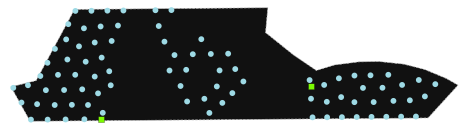

In [5]:
wfn.plot_location()

### Optimize Walney Extension

Initial heuristic solution to warm-start the solver:

In [6]:
router_pre_solver = Heuristic(solver='Esau_Williams')
res_pre_solver= wfn.optimize(router=router_pre_solver)
print(wfn.length())

138993.15889595688


In [7]:
router_milp = MILP(solver_name='cbc', time_limit=150, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=router_milp)

>>> Using warm start: the model is initialized with the provided solution S <<<
Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - C:\my_program_files\cbc\bin\cbc.exe -threads 8 -timeMode elapsed -nodeStrategy downFewest -Dins on -VndVariableNeighborhoodSearch on -Rens on -Rins on -pivotAndComplement off -proximitySearch off -gomoryCuts on -mixedIntegerRoundingCuts on -flowCoverCuts on -cliqueCuts off -twoMirCuts off -knapsackCuts off -probingCuts off -zeroHalfCuts off -liftAndProjectCuts off -residualCapacityCuts off -seconds 150 -ratioGap 0.005 -printingOptions all -import C:\Users\amia\AppData\Local\Temp\tmpbchgev9c.pyomo.lp -mipstart \Users\amia\AppData\Local\Temp\tmpkj3slw8t.cbc.soln -stat=1 -solve -solu C:\Users\amia\AppData\Local\Temp\tmpbchgev9c.pyomo.soln (default strategy 1)
threads was changed from 0 to 8
Option for timeMode changed from cpu to elapsed
Option for nodeStrategy changed from fewest to downfewest
Option for Dins changed fro

In [8]:
wfn.G.SolutionInfo

SolutionInfo(runtime=150.79, bound=126797.11, objective=135428.62232837, relgap=0.0637347717193889, termination='maxTimeLimit')

In [9]:
wfn.length()

135900.91413860072

<Axes: >

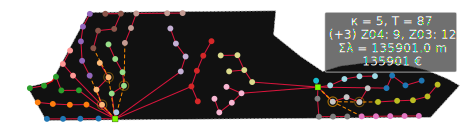

In [10]:
wfn.plot()